In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
with open('../results/vary_plasticity_th.pkl', 'rb') as f:
    df = pickle.load(f)
df = pd.DataFrame(df)
df_correct = df[df.trial=='correct'].copy()
df_perturb = df[df.trial=='perturb'].copy()

In [11]:
# valid because each adjacent row of (correct, perturb) experiments
# comes from the same network
df_correct['quality_cancel'] = [np.mean(np.abs(i-np.mean(j))) 
                                for i,j in zip(df_correct['sim_ts'], df_perturb['sim_bos'])]

[Text(0, 0.5, 'Quality of\ncancellation'),
 Text(0.5, 0, '$\\theta_r$, equilibrium of\nplasticity (Hz)')]

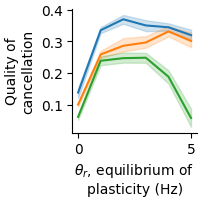

In [13]:
fig, ax = plt.subplots(1, 1, sharex='all', figsize=(2, 2))
hue_order = ['FF', 'EI', 'EIrec']
sns.lineplot(data=df_correct, x='th', y='quality_cancel', 
             hue='model', hue_order=hue_order, legend=False, ax=ax)
ax.set(ylabel='Quality of\ncancellation', xlabel='$\\theta_r$, equilibrium of\nplasticity (Hz)')

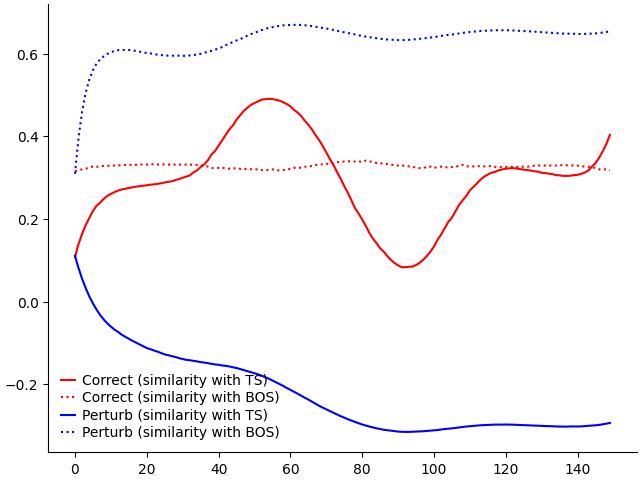

In [7]:
m, th = 'FF', 1
plt.plot(df[(df.model==m)&(df.th==th)&(df.trial=='correct')].iloc[0,3], c='r', 
         label='Correct (similarity with TS)')
plt.plot(df[(df.model==m)&(df.th==th)&(df.trial=='correct')].iloc[0,4], c='r', ls=':', 
         label='Correct (similarity with BOS)')
plt.plot(df[(df.model==m)&(df.th==th)&(df.trial=='perturb')].iloc[0,3], c='b', 
         label='Perturb (similarity with TS)')
plt.plot(df[(df.model==m)&(df.th==th)&(df.trial=='perturb')].iloc[0,4], c='b', ls=':', 
         label='Perturb (similarity with BOS)')
plt.legend()